In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
import numpy as np

In [2]:
# Build dataframes to test plotting:
hab01data = {'density':[0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
      'totalIxode':[84, 87, 54, 85, 57, 124]}
hab01df = pd.DataFrame(hab01data)

hab02data = {'density':[0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
      'totalIxode':[114, 87, 184, 185, 222, 224]}
hab02df = pd.DataFrame(hab02data)

hab03data = {'density':[0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
      'totalIxode':[464, 587, 484, 385, 457, 424]}
hab03df = pd.DataFrame(hab03data)

hab03df.dtypes

density       float64
totalIxode      int64
dtype: object

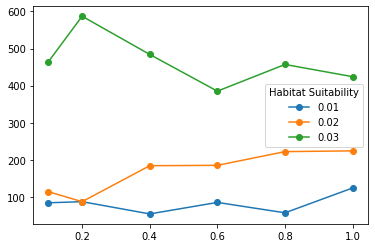

In [3]:
# Plot test dataframes
fig = plt.figure()
plt.plot('density', 'totalIxode', data=hab01df, marker='o', label='0.01')
plt.plot('density', 'totalIxode', data=hab02df, marker='o', label='0.02')
plt.plot('density', 'totalIxode', data=hab03df, marker='o', label='0.03')
plt.legend(title="Habitat Suitability")
plt.show()
# fig.savefig("[root-directory]/data/plots/000.png")

In [13]:
data = pd.read_csv("")
data.head()

,run,tick,Lifestate,habitat_sample,Name
0,5,1.0,adult,0.05,Tick 1
1,5,1.0,adult,0.05,Tick 2
2,5,1.0,adult,0.05,Tick 3
3,5,1.0,adult,0.05,Tick 4
4,5,6.0,egg,0.05,Child 375 of Tick 2


In [34]:
# data['Name'].value_counts().count()
len(data['Name'].unique())

22987

In [38]:

for run in data.groupby('run'):
    df = run[1]
    print("Run {} went {} days w/ {} Ixodes".format(run[0], df['tick'].max(), len(df['Name'].unique())))


Run 5 went 446.0 days w/ 2987 Ixodes
Run 13 went 450.0 days w/ 2990 Ixodes
Run 21 went 450.0 days w/ 5975 Ixodes
Run 29 went 396.0 days w/ 11049 Ixodes


In [19]:
# rough-draft code to create param dict
# paramfile = "../data/host-density/adult-runs/param_inputi1.txt"
# # plist = []
# # with open(paramfile, 'r') as f:
# #     for line in f:
# #         plist.extend(line.replace("\t", ",").split(','))
# #         print(plist)
# paramdict = {}
# with open(paramfile, 'r') as file:
#     for line in file:
#         result = line.replace("\t",",").split(',')
#         # print(result)
#         try:
#             paramdict[result[8]][0].append(result[0])
#             paramdict[result[8]][1].append(result[4])
#         except:
#             print("Exception occured")
#         if result[8] in paramdict.keys():
#             # Key already in dict
#             # FIXME --- make try/catch
#             if result[0] in paramdict.values():
#                 print("run already in")
#             else: #Key not in dict
#                 paramdict[result[8]][0].append(result[0])
#                 paramdict[result[8]][1].append(result[4])
#         else: # new habitat value, add it and the lines run# and density as values
#             print("Adding",result[8])
#             paramdict[result[8]] = [[result[0]], [result[4]]]
# print(paramdict)
# for k, v in paramdict.items():
#     print(k,v)


Exception occured
Adding 0.01

Exception occured
Adding 0.09

Exception occured
Adding 0.07

Exception occured
Adding 0.05

Exception occured
Adding 0.03

{'0.01\n': [['1', '41', '41', '81', '81'], ['0.1', '0.5', '0.5', '0.9', '0.9']], '0.09\n': [['9', '49', '49', '89', '89'], ['0.1', '0.5', '0.5', '0.9', '0.9']], '0.07\n': [['17', '57', '57', '97', '97'], ['0.2', '0.6', '0.6', '1.0', '1.0']], '0.05\n': [['25', '65', '65'], ['0.3', '0.7', '0.7']], '0.03\n': [['33', '73', '73'], ['0.4', '0.8', '0.8']]}
0.01
 [['1', '41', '41', '81', '81'], ['0.1', '0.5', '0.5', '0.9', '0.9']]
0.09
 [['9', '49', '49', '89', '89'], ['0.1', '0.5', '0.5', '0.9', '0.9']]
0.07
 [['17', '57', '57', '97', '97'], ['0.2', '0.6', '0.6', '1.0', '1.0']]
0.05
 [['25', '65', '65'], ['0.3', '0.7', '0.7']]
0.03
 [['33', '73', '73'], ['0.4', '0.8', '0.8']]


In [2]:
#
# This code parses the parameter txt and creates a dictionary that maps the habitat_suitability value with the
# corresponding run_number and host_density values
#
# { habitat: [ [run_number], [host_density] ] }
#
paramfile = "../data/host-density/adult-runs/instances/param_inputi1.txt"
paramd = {}
with open(paramfile, 'r') as file:
    for line in file:
        result = line.replace("\t",",").split(',')
# Try to add the values to the key, if that key does not exist, create it
        try:
            paramd[float(result[8])][0].append(int(result[0])) # add run number
            paramd[float(result[8])][1].append(float(result[4])) # add host density
        except KeyError:
            paramd[float(result[8])] = [[int(result[0])], [float(result[4])]]

for k, v in paramd.items():
    print(k,v)


0.01 [[1, 41, 81], [0.1, 0.5, 0.9]]
0.09 [[9, 49, 89], [0.1, 0.5, 0.9]]
0.07 [[17, 57, 97], [0.2, 0.6, 1.0]]
0.05 [[25, 65], [0.3, 0.7]]
0.03 [[33, 73], [0.4, 0.8]]


In [4]:
# # Helper - recursively list directories and files
# directory = "../data/host-density/adult-runs"
# for dir_name, subdir, files in os.walk(directory):
#     print("Found directory: %s" % dir_name)
#     for fname in files:
#         print("Found file: %s" % fname)

Found directory: ../data/host-density/adult-runs
Found file: debug.log
Found file: status_output.properties
Found file: unrolledParamFile.txt
Found file: config.props
Found file: MessageCenter.log4j.properties
Found file: local_batch_run.properties
Found directory: ../data/host-density/adult-runs/data-files
Found file: data-survival.i3.2020.May.27.03_06_35
Found file: data-survival.i2.2020.May.27.03_06_36
Found file: data-survival.i5.2020.May.27.03_06_35
Found file: data-survival.i6.2020.May.27.03_06_36
Found file: data-survival.i4.2020.May.27.03_06_36
Found file: data-survival.i7.2020.May.27.03_06_36
Found file: data-survival.i8.2020.May.27.03_06_35
Found file: data-survival.i1.2020.May.27.03_06_35


In [ ]:
# TODO - Read all files in directory and create a dict to map run number to how many total ixode
# ixode_count_dict = {}
# path = "../data/host-density/adult-runs/data-files/"
# for filename in os.listdir(path):
#     print(filename)
#     if not '.txt' in filename:
#         df = pd.read_csv(str(path + filename))
#         for run in df.groupby('run'):
#             df = run[1]
#             ixode_count_dict[run[0]] = len(current_df['name'].unique())
#             print("Run {} went {} days w/ {} Ixodes".format(run[0], df['tick'].max(), len(df['name'].unique())))

data-survival.i3.2020.May.27.03_06_35
Run 3 went 86.0 days w/ 10 Ixodes
Run 11 went 450.0 days w/ 2154 Ixodes
Run 19 went 450.0 days w/ 53551 Ixodes
Run 27 went 86.0 days w/ 10 Ixodes
Run 35 went 450.0 days w/ 53200 Ixodes
Run 43 went 450.0 days w/ 35395 Ixodes
Run 51 went 450.0 days w/ 18580 Ixodes
Run 59 went 450.0 days w/ 32827 Ixodes
Run 67 went 450.0 days w/ 19230 Ixodes
Run 75 went 450.0 days w/ 12302 Ixodes
Run 83 went 450.0 days w/ 3449 Ixodes
Run 91 went 450.0 days w/ 29669 Ixodes
Run 99 went 450.0 days w/ 34711 Ixodes
param_inputi1.txt
data-survival.i2.2020.May.27.03_06_36


In [3]:
# # Read 1 specified file and create a dictionary from it that maps the number of ixode to each run
ixode_count_dict = {}
df = pd.read_csv("../data/host-density/adult-runs/instances/data-survival.i1.2020.May.27.03_06_35")
for run in df.groupby('run'):
    current_df = run[1]
    ixode_count_dict[run[0]] = len(current_df['name'].unique())
    print("Run {}".format(run[0]))

Run 1
Run 9
Run 17
Run 25
Run 33
Run 41
Run 49
Run 57
Run 65
Run 73
Run 81
Run 89
Run 97


In [4]:
# Create a data frame from the above generated dictionary
df_final = pd.DataFrame(ixode_count_dict.items(), columns=['run', 'total_ixode'])
df_final['host_density'] = 0
df_final.dtypes

run             int64
total_ixode     int64
host_density    int64
dtype: object

In [5]:
# Iterate through parameter dictionary and use loc to find the row with the run number we want. Once we have this, add
# the host density value for that associated run
for key, value in paramd.items():
    for i in range(len(value[0])):
        # Both of these techniques work, but loc is preferred over chained indexing
        # df_final['host_density'][df_final['run'] == value[0][i]] = value[1][i]
        df_final.loc[df_final['run']==value[0][i], 'host_density'] = value[1][i]
        df_final.loc[df_final['run']==value[0][i], 'habitat_suitability'] = key

In [31]:
# TODO labels for each host density value (sort?), axis labels
matplotlib.use('Qt5Agg')
fig = plt.figure()
for hab in df_final.groupby('habitat_suitability'):
    dat = hab[1]
    plt.ylabel('Cumulative Ixodes')
    plt.xlabel('Large host density')
    plt.xlim([0.1, 1.0])
    plt.title("Some Title")
    plt.plot('host_density', 'total_ixode' , data=dat, marker='o', markersize=5, linewidth=1, label=hab[0])
    plt.legend()
plt.show(block=True)

